   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null   

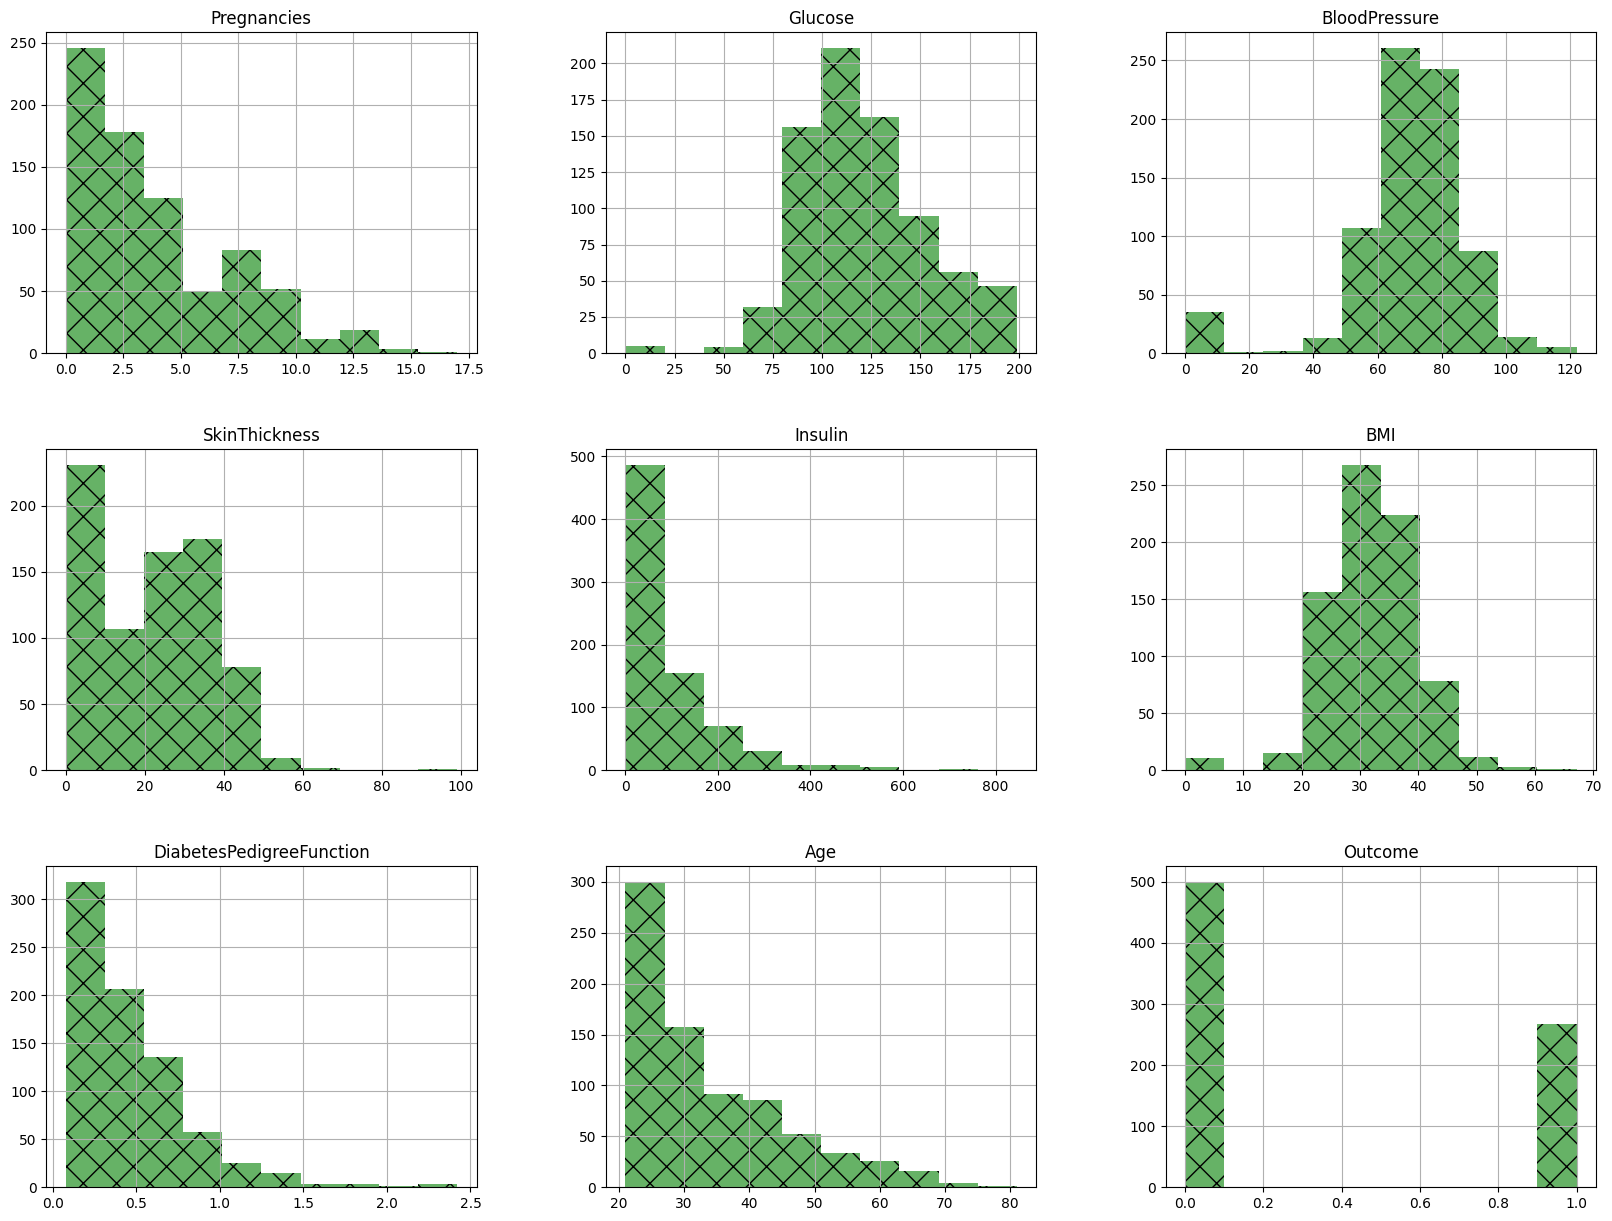

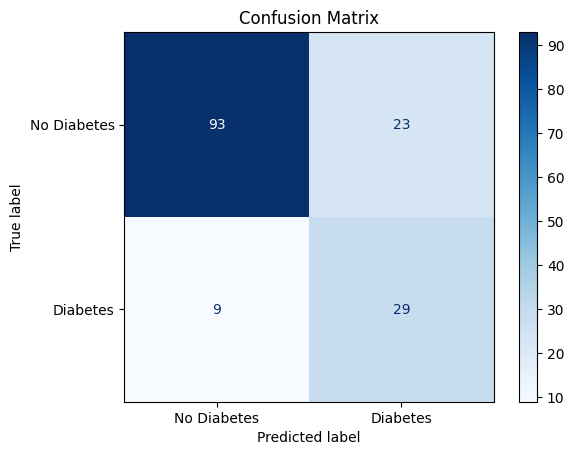

k=1, accuracy=0.6818
k=2, accuracy=0.6948
k=3, accuracy=0.7403
k=4, accuracy=0.7468
k=5, accuracy=0.7597
k=6, accuracy=0.7662
k=7, accuracy=0.7792
k=8, accuracy=0.7597
k=9, accuracy=0.7727
k=10, accuracy=0.7597
k=11, accuracy=0.7792
k=12, accuracy=0.7662
k=13, accuracy=0.7468
k=14, accuracy=0.7727
k=15, accuracy=0.7532
k=16, accuracy=0.7792
k=17, accuracy=0.7532
k=18, accuracy=0.7662
k=19, accuracy=0.7662
k=20, accuracy=0.7922


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/AdilAshfaq001/ML_DecisionTree_KNN_KMeans2/refs/heads/master/diabetes.csv"

df = pd.read_csv(url)
print(df.head(3))
print(df.info())
print(df.shape)
print(df.isna().sum())
print(df.Insulin.sum())


df.hist(bins=10, figsize=(20,15), color='green', alpha=0.6, hatch='X');

X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=4)

sc = StandardScaler()

xtr = sc.fit_transform(xtr)
xte = sc.transform(xte)

clf = KNeighborsClassifier(n_neighbors=20, p=1, metric='manhattan')
clf.fit(xtr,ytr)

pred = clf.predict(xte)

cm =confusion_matrix(pred, yte)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

for k in range(1, 21):
    clf = KNeighborsClassifier(n_neighbors=k, p=1, metric='manhattan')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
    clf.fit(xtr, ytr)
    score = clf.score(xte, yte)
    print(f"k={k}, accuracy={score:.4f}")
